# Hotel reviews sentiment analysis project Using Python

Problem Statement
In this hotel reviews sentiment analysis project, the primary aim is to develop a robust model capable of categorizing customer reviews into positive, negative, or neutral sentiments. The significance of this undertaking lies in the hospitality industry's reliance on customer feedback for continuous improvement and maintaining high levels of customer satisfaction. The stepwise approach begins with the collection of a labeled dataset containing hotel reviews, followed by meticulous data preprocessing to cleanse and standardize the text data. Exploratory Data Analysis (EDA) is then conducted to gain insights into sentiment distribution and identify key features influencing sentiments.

Subsequently, the text data undergoes vectorization, transforming it into a numerical format using techniques like TF-IDF or word embeddings. The core of the project involves the development of a sentiment analysis model, be it machine learning or deep learning, trained to predict sentiments based on the preprocessed text. Model evaluation is a critical step, assessing its performance using relevant metrics and allowing for fine-tuning if necessary. The ultimate goal is to deploy the model for real-time or batch sentiment analysis of hotel reviews.

The expected outcome of the Jupyter file includes well-documented and executable code covering the entire sentiment analysis process. Additionally, the file should provide valuable insights derived from EDA and model evaluation, facilitating informed decision-making based on the sentiments expressed in hotel reviews.

# Import Library

In [1]:
import pandas as pd

In [16]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Syed
[nltk_data]     Arif\AppData\Roaming\nltk_data...


True

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

# Uploading Csv fle

In [3]:
df = pd.read_csv(r"C:\Users\Syed Arif\Desktop\Hotel Reviews.csv")

# Data Preprocessing


# .head()

head is used show to the By default = 5 rows in the dataset

In [4]:
df.head()

,Unnamed: 0,Customer_name,Rating,Review_Title,Review
0,0,maneshpreet26,5,Unforgettable experience..amazing staycation e...,We visited Grand Hyatt on the occasion of my s...
1,1,Majnu gosavi,5,All about in love with grand Hyatt hotel,तुम्हारी क्या तारीफ करू तुम्ह ही तो तारीफ हो ...
2,2,Akash Bhosale,5,Most Knowledgeable Trainer,I was fascinated by the Diet and Exercise know...
3,3,Mahek Dugar,5,A night stay at Grand Hyatt Mumbai,"absolutely loved the stay. amazing food, ambie..."
4,4,Jaslin,4,Staycation,I had booked Grand Hyatt Santacruz for Staycat...


In [29]:
df = df.drop('Unnamed: 0', axis=1)

# .tail()

tail is used to show rows by Descending order

In [30]:
df.tail()

,Customer_name,Rating,Review_Title,Review,Positive,Negative,Neutral
4995,anticorpo,4,Very Competent,Excellent international hotel with all things ...,0.163,0.000,0.837
4996,David B,5,Luxurious,This hotel is situated near Mumbai airport but...,0.281,0.057,0.662
4997,rahekt,4,the co-operation was the best,the co-operation was the best and services was...,0.372,0.000,0.628
4998,TravlAdvisor,4,Best Italian Restaurant,Hotel is located very close to the Domestic Ai...,0.280,0.000,0.720
4999,Getabreak,5,"Quiet, comfortable and good food",I have stayed here a few times over the past 1...,0.281,0.035,0.684


# .shape

It show the total no of rows & Column in the dataset

In [31]:
df.shape

(5000, 7)

# .Columns

It show the no of each Column

In [32]:
df.columns

Index(['Customer_name', 'Rating', 'Review_Title', 'Review', 'Positive',
       'Negative', 'Neutral'],
      dtype='object')

# .dtypes

This Attribute show the data type of each column

In [33]:
df.dtypes

Customer_name     object
Rating             int64
Review_Title      object
Review            object
Positive         float64
Negative         float64
Neutral          float64
dtype: object

# .unique()

In a column, It show the unique value of specific column.

In [34]:
df["Review_Title"].unique()

array(['Unforgettable experience..amazing staycation ever!!!',
       'All about in love with grand Hyatt hotel',
       'Most Knowledgeable Trainer', ..., 'the co-operation was the best',
       'Best Italian Restaurant', 'Quiet, comfortable and good food'],
      dtype=object)

# .nuique()

It will show the total no of unque value from whole data frame

In [35]:
df.nunique()

Customer_name    4701
Rating              5
Review_Title     4229
Review           4999
Positive          549
Negative          206
Neutral           525
dtype: int64

# .describe()

It show the Count, mean , median etc

In [36]:
df.describe()

,Rating,Positive,Negative,Neutral
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,4.431400,0.256947,0.022488,0.720568
std,0.992518,0.117048,0.039207,0.104332
min,1.000000,0.000000,0.000000,0.355000
25%,4.000000,0.171000,0.000000,0.652000
50%,5.000000,0.258000,0.000000,0.725000
75%,5.000000,0.337000,0.034000,0.795000
max,5.000000,0.645000,0.332000,1.000000


# .value_counts

It Shows all the unique values with their count

In [37]:
df["Review_Title"].value_counts()

Excellent                           40
Grand Hyatt Mumbai                  29
Great Hotel                         20
Excellent stay                      19
Staycation                          14
                                    ..
GYM                                  1
Underwhelming                        1
Grand Hyatt Airport Services         1
Excellent Staff - Ms.Roshell         1
Quiet, comfortable and good food     1
Name: Review_Title, Length: 4229, dtype: int64

# .isnull()

It shows the how many null values

In [38]:
df.isnull()

,Customer_name,Rating,Review_Title,Review,Positive,Negative,Neutral
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


<AxesSubplot:>

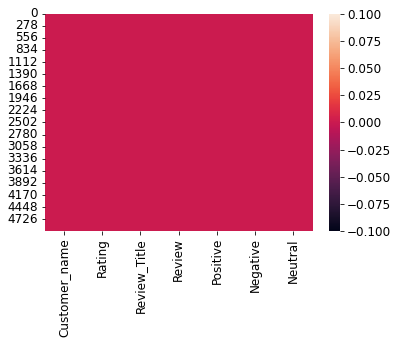

In [39]:
sns.heatmap(df.isnull())

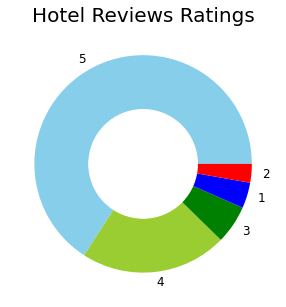

In [40]:
ratings = df["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'green', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Hotel Reviews Ratings", fontsize=20)
plt.show()

In [41]:
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Review"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Review"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Review"]]
print(df.head())

   Customer_name  Rating                                       Review_Title  \
0  maneshpreet26       5  Unforgettable experience..amazing staycation e...   
1   Majnu gosavi       5           All about in love with grand Hyatt hotel   
2  Akash Bhosale       5                         Most Knowledgeable Trainer   
3    Mahek Dugar       5                 A night stay at Grand Hyatt Mumbai   
4         Jaslin       4                                         Staycation   

                                              Review  Positive  Negative  \
0  We visited Grand Hyatt on the occasion of my s...     0.313     0.000   
1  तुम्हारी क्या तारीफ करू  तुम्ह ही तो तारीफ हो ...     0.296     0.036   
2  I was fascinated by the Diet and Exercise know...     0.391     0.000   
3  absolutely loved the stay. amazing food, ambie...     0.439     0.000   
4  I had booked Grand Hyatt Santacruz for Staycat...     0.263     0.000   

   Neutral  
0    0.687  
1    0.668  
2    0.609  
3    0.561  
4  

In [42]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [43]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  1284.7339999999986
Negative:  112.44200000000059
Neutral:  3602.840000000002
